Pandas 
& Duckdb

In [14]:
import duckdb
from pathlib import Path

duckdb_path = "data/sakila.duckdb"
Path(duckdb_path).unlink(missing_ok=True) # it will delete the path if it already exixts(idempotent -  ths can run the the code several times)

with duckdb.connect(duckdb_path) as conn, open("sql/load_sakila.sql") as ingest_script:
    conn.sql(ingest_script.read())

    description = conn.sql("DESC;").df()
    films = conn.sql("FROM film;").df()



In [11]:
films

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,<NA>,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,<NA>,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,<NA>,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2021-03-06 15:52:08
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,<NA>,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2021-03-06 15:52:08
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,<NA>,6,0.99,105,10.99,NC-17,Deleted Scenes,2021-03-06 15:52:08
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,<NA>,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:08


In [13]:
films.head(3)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [15]:
description

,database,schema,name,column_names,column_types,temporary
0,sakila,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",False
1,sakila,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
2,sakila,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
3,sakila,main,city,"[city_id, city, country_id, last_update]","[BIGINT, VARCHAR, BIGINT, TIMESTAMP]",False
4,sakila,main,country,"[country_id, country, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
5,sakila,main,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",False
6,sakila,main,customer_list,"[ID, name, address, zip_code, phone, city, cou...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, VARCHAR, V...",False
7,sakila,main,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",False
8,sakila,main,film_actor,"[actor_id, film_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False
9,sakila,main,film_category,"[film_id, category_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False


Read in all data into dictionary of pandas dataframes
nice data structure to work with

In [16]:
dfs = {}

with duckdb.connect(duckdb_path) as conn: # Open a connection to a DuckDB database, use it, and automatically close it when done.(automatically closes)
    for name in description['name']:
        dfs[name] = conn.sql(f"FROM {name};").df()

In [17]:
dfs.keys()

dict_keys(['actor', 'address', 'category', 'city', 'country', 'customer', 'customer_list', 'film', 'film_actor', 'film_category', 'film_list', 'film_text', 'inventory', 'language', 'payment', 'rental', 'sales_by_film_category', 'sales_by_store', 'staff', 'staff_list', 'store'])

In [18]:
dfs["film_actor"].head()

,actor_id,film_id,last_update
0,1,1,2021-03-06 15:52:45
1,1,23,2021-03-06 15:52:45
2,1,25,2021-03-06 15:52:45
3,1,106,2021-03-06 15:52:45
4,1,140,2021-03-06 15:52:45


In [19]:
dfs["country"].head()

,country_id,country,last_update
0,1,Afghanistan,2021-03-06 15:51:49
1,2,Algeria,2021-03-06 15:51:49
2,3,American Samoa,2021-03-06 15:51:49
3,4,Angola,2021-03-06 15:51:49
4,5,Anguilla,2021-03-06 15:51:49


In [20]:
dfs["film"].head(2)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [21]:
dfs["actor"].head(2)

,actor_id,first_name,last_name,last_update
0,1.0,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2.0,NICK,WAHLBERG,2021-03-06 15:51:59


Register all dataframes in duckdb(cannot work with dictionaries)

In [22]:
film_names = ("film", "film_actor", "film_category", "actor", "category")

for film_name in film_names:
    duckdb.register(film_name, dfs[film_name])

duckdb.sql("desc;").df()

,database,schema,name,column_names,column_types,temporary
0,temp,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",True
1,temp,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",True
2,temp,main,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",True
3,temp,main,film_actor,"[actor_id, film_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",True
4,temp,main,film_category,"[film_id, category_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",True


Join film related dataframes using duckdb
Joins are much cleaner to write in SQL than in pandas so we use duckdb to do the joins. To do that we need to first register the dataframes as views in duckdb.

duckdb parser looks for variable name and can't evaluate dictionary lookup so we need to register it into a view first
After joining, pick out the columns we want

In [23]:
duckdb.sql("from actor;").df()

,actor_id,first_name,last_name,last_update
0,1.0,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2.0,NICK,WAHLBERG,2021-03-06 15:51:59
2,3.0,ED,CHASE,2021-03-06 15:51:59
3,4.0,JENNIFER,DAVIS,2021-03-06 15:51:59
4,5.0,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59
...,...,...,...,...
195,196.0,BELA,WALKEN,2021-03-06 15:52:00
196,197.0,REESE,WEST,2021-03-06 15:52:00
197,198.0,MARY,KEITEL,2021-03-06 15:52:00
198,199.0,JULIA,FAWCETT,2021-03-06 15:52:00


In [25]:
films_joined = duckdb.sql("""
    SELECT
        a.first_name || ' ' || a.last_name AS actor, 
        a.actor_id::INT AS actor_id,
        f.title,
        f.description,
        f.release_year,
        f.rental_duration,
        f.rating,
        c.name AS category
    FROM film f
        LEFT JOIN film_actor fa ON f.film_id = fa.film_id
        LEFT JOIN actor a ON a.actor_id = fa.actor_id
        LEFT JOIN film_category fc ON fc.film_id = f.film_id      
        LEFT JOIN category c ON fc.category_id = c.category_id      
""").df()

films_joined.head(2)

,actor,actor_id,title,description,release_year,rental_duration,rating,category
0,PENELOPE GUINESS,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,6,PG,Documentary
1,PENELOPE GUINESS,1,ANACONDA CONFESSIONS,A Lacklusture Display of a Dentist And a Denti...,2006,3,R,Animation


In [26]:
films_joined.columns

Index(['actor', 'actor_id', 'title', 'description', 'release_year',
       'rental_duration', 'rating', 'category'],
      dtype='object')

EDA

In [28]:
films_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5465 entries, 0 to 5464
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   actor            5462 non-null   object
 1   actor_id         5462 non-null   Int32 
 2   title            5465 non-null   object
 3   description      5465 non-null   object
 4   release_year     5465 non-null   object
 5   rental_duration  5465 non-null   int64 
 6   rating           5465 non-null   object
 7   category         5465 non-null   object
dtypes: Int32(1), int64(1), object(6)
memory usage: 325.7+ KB


In [29]:
films_joined["rating"].value_counts()

rating
PG-13    1184
PG       1143
NC-17    1128
R        1033
G         977
Name: count, dtype: int64

In [31]:
#days
films_joined["rental_duration"].value_counts()

rental_duration
6    1201
4    1113
3    1087
5    1057
7    1007
Name: count, dtype: int64

In [32]:
films_joined.describe()

,actor_id,rental_duration
count,5462.0,5465.000000
mean,100.952398,4.986825
std,56.993852,1.398667
min,1.0,3.000000
25%,52.0,4.000000
50%,102.0,5.000000
75%,149.0,6.000000
max,200.0,7.000000


In [33]:
films_joined.describe()["rental_duration"]

count    5465.000000
mean        4.986825
std         1.398667
min         3.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         7.000000
Name: rental_duration, dtype: float64

which top 10 actors have played in most films?

In [34]:
actor_films = duckdb.sql("""
    SELECT 
        actor,
        COUNT(*) AS number_films
    FROM films_joined
    GROUP BY actor
    ORDER BY number_films DESC
           
""").df()

actor_films.head(10)

,actor,number_films
0,SUSAN DAVIS,54
1,GINA DEGENERES,42
2,WALTER TORN,41
3,MARY KEITEL,40
4,MATTHEW CARREY,39
5,SANDRA KILMER,37
6,SCARLETT DAMON,36
7,VIVIEN BASINGER,35
8,ANGELA WITHERSPOON,35
9,GROUCHO DUNST,35



Some visualizations

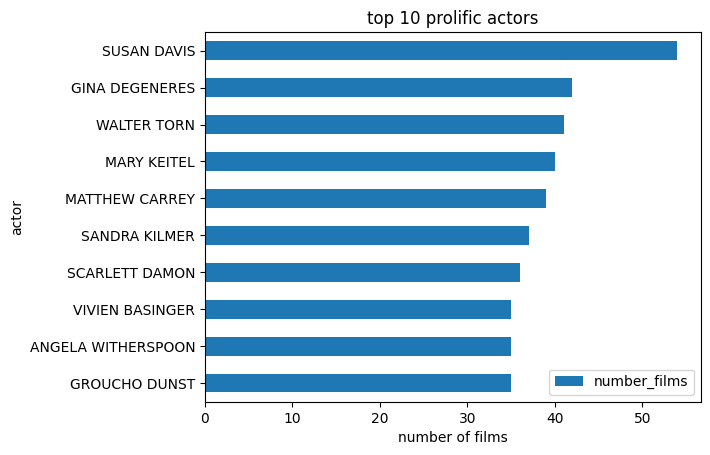

In [35]:
ax = actor_films.head(10).plot(
    kind="barh",
    x="actor",
    y="number_films",
    title="top 10 prolific actors",
    xlabel="number of films",
)
ax.invert_yaxis()